# Naive Bayes Assignment

### Salary data

In [2]:
# Importing the important libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset

df_test = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/12 Naive Bayes/SalaryData_test.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
df_train = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/12 Naive Bayes/SalaryData_Train.csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Converting the categorical columns into integer

from sklearn.preprocessing import LabelEncoder
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [8]:
# Converting the categorical columns into integer
from sklearn.preprocessing import LabelEncoder
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


### Extracting independent and dependent variables

In [13]:
X_train = df_train.drop(['education','relationship','native','maritalstatus','sex','race'], axis=1).values
Y_train = df_train['Salary'].values
print(np.unique(Y_train))
X_train

[0 1]


array([[22,  5, 12, ...,  0, 39,  0],
       [33,  4, 12, ...,  0, 12,  0],
       [21,  2,  8, ...,  0, 39,  0],
       ...,
       [41,  2,  8, ...,  0, 39,  0],
       [ 5,  2,  8, ...,  0, 19,  0],
       [35,  3,  8, ...,  0, 39,  1]], dtype=int64)

In [14]:
X_test = df_test.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_test = df_test['Salary'].values
print(np.unique(Y_test))
X_test

[0 1]


array([[ 8,  2,  6, ...,  0, 39,  0],
       [21,  2,  8, ...,  0, 49,  0],
       [11,  1, 11, ...,  0, 39,  1],
       ...,
       [21,  2, 12, ...,  0, 49,  0],
       [27,  2, 12, ...,  0, 39,  0],
       [18,  3, 12, ...,  0, 59,  1]], dtype=int64)

In [15]:
#training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb =  GaussianNB()
gnb.fit(X_train, Y_train)

# Making predictions on the testing set
y_pred = gnb.predict(X_test)

# Comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


In [16]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [17]:
# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train, Y_train)
classifier_mb.score(X_train, Y_train)
classifier_mb.score(X_test, Y_test)
predicted_result = classifier_mb.predict(X_train)
accuracy_train = np.mean(predicted_result == Y_train)
accuracy_train

0.7800802360664434

In [18]:
test_predict = classifier_mb.predict(X_test)
accuracy_test = np.mean(test_predict == Y_test)
accuracy_test

0.7820053120849934

Text(0, 0.5, 'Frequency')

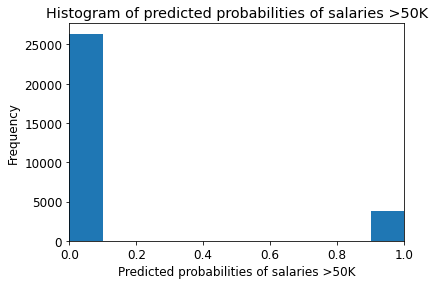

In [26]:
# MB
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(predicted_result, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [19]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(X_train, Y_train)
classifier_gb.score(X_train, Y_train)
classifier_gb.score(X_test, Y_test)
train_pred = classifier_gb.predict(X_train)
accuracy_train = np.mean(train_pred == Y_train)
accuracy_train

1.0

In [21]:
test_pred = classifier_gb.predict(X_test)
accuracy_test = np.mean(test_pred == Y_test)
accuracy_test

1.0

Text(0, 0.5, 'Frequency')

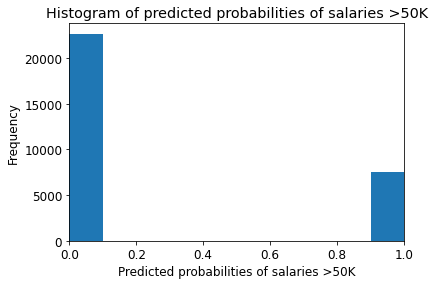

In [27]:
# GB
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(train_pred, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')